In [16]:
# Load Libraries 
import pandas as pd
import numpy as np
import os

### Load Data

In [35]:
user_file_path = os.path.join('..', 'data_out', 'User_clean.csv')
users = pd.read_csv(user_file_path)
file_path = os.path.join('..', 'data_out', 'Symptoms_clean.csv')
symptoms = pd.read_csv(file_path)
file_path = os.path.join('..', 'data_out', 'Clean_periods_clean.csv')
periods = pd.read_csv(file_path)
periods['length'] = pd.to_timedelta(periods.length)
periods['days'] = periods.length.dt.days

In [34]:
periods.head()

,Unnamed: 0,id,start_date,end_date,user_id,start_date_fix,end_date_fix,length
0,0,352,5/4/15,10/4/15,252,2015-04-05,2015-04-10,5 days
1,1,353,23/3/15,27/3/15,253,2015-03-23,2015-03-27,4 days
2,2,354,6/4/15,11/4/15,254,2015-04-06,2015-04-11,5 days
3,3,355,21/3/15,24/3/15,255,2015-03-21,2015-03-24,3 days
4,4,356,26/3/15,31/3/15,256,2015-03-26,2015-03-31,5 days


In [18]:
users.head()

,Unnamed: 0,id,dob,cycle_length_initial,period_length_initial,dob_fix
0,0,252,NaN,28,6,NaN
1,1,253,NaN,30,5,NaN
2,2,254,NaN,28,6,NaN
3,3,255,NaN,30,4,NaN
4,4,256,NaN,25,6,NaN


In [19]:
import pixiedust

In [25]:
users.rename(columns={'cycle_length_initial':'Cycle Length'}, inplace=True)
users.rename(columns={'period_length_initial':'Period Length'}, inplace=True)

In [36]:
display(periods)


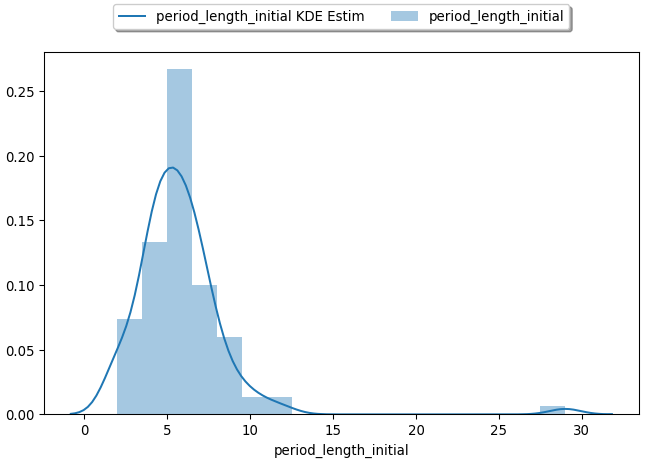

In [37]:
display(users)


In [48]:
estimated_period_len = users.period_length_initial
estimated_period_len = list(filter(lambda x: x<15, estimated_period_len))
actual_period_len = periods.days

In [41]:
estimated_period_len

0       6
1       5
2       6
3       4
4       6
5       6
6       5
7       6
8       6
9       5
10      5
11      4
12      7
13      5
14      8
15      5
16      8
17      6
18      6
19      4
20      7
21      7
22      5
23      3
24      4
25      8
26      4
27      6
28      6
29      5
       ..
6699    6
6700    7
6701    4
6702    8
6703    7
6704    7
6705    5
6706    6
6707    3
6708    5
6709    6
6710    7
6711    5
6712    6
6713    3
6714    7
6715    6
6716    5
6717    6
6718    7
6719    3
6720    6
6721    5
6722    2
6723    4
6724    4
6725    5
6726    4
6727    5
6728    6
Name: period_length_initial, Length: 6729, dtype: int64

C:\Users\patrick.cronin\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


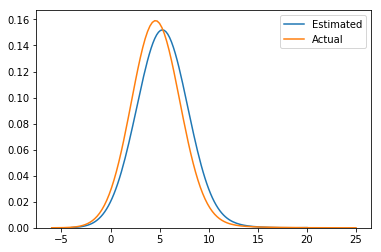

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.kdeplot(estimated_period_len)
sns.kdeplot(estimated_period_len, bw=2, label="Estimated")
sns.kdeplot(actual_period_len, bw=2, label="Actual")
plt.legend();